### Generation of CDFs, PDFs, and QQ-plots
### (paper)

In [1]:
import sys

import scipy.stats as st
import statsmodels.api as sm

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline

# useful utilities
# -----------------------
sys.path.append("./modules")
import utils
import PDplot
from PDplot import ALPHA, RIPS, COLS
# -----------------------



# Universal distribtion
# -----------------------
RVSTD = st.gumbel_l()
# -----------------------

# Data location
# -----------------------
ROOT = './files'
# -----------------------

# Visual fine tuning
# -----------------------
sns.set_theme(style="darkgrid")
FIG_SIZE = (18,5)
DPI = 300
FN_TITLE = 30
FN_AXES = 24

FN_LEGEND = 14
FN_TICK = 14
RIPS_LIM_1 = 1.0
RIPS_LIM_2 = 0.4
ALPHA_LIM_1 = 1.75
ALPHA_LIM_2 = 0.5
# -----------------------


In [2]:
# List of examples - Cech/Alpha
# --------------------------
# Format: APLIST(dimension)(homological dimension)

APLIST21 = ([
    [ALPHA, 'box', 2, 1],
    [ALPHA, 'torus', 2, 1],
    [ALPHA, 'projective', 2, 1],
    [ALPHA, 'klein', 2, 1],
    [ALPHA, 'normal', 2, 1],
    [ALPHA, 'cauchy', 2, 1],
])

APLIST31 = ([
    [ALPHA, 'box', 3, 1],
    [ALPHA, 'sphere', 3, 1],
    [ALPHA, 'normal', 3, 1],
    [ALPHA, 'cauchy', 3, 1],
])

APLIST41 = ([
    [ALPHA, 'box', 4, 1],
    [ALPHA, 'sphere', 4, 1],
    [ALPHA, 'normal', 4, 1],
    [ALPHA, 'cauchy', 4, 1],
])

APLIST32 = ([    
    [ALPHA, 'box', 3, 2],
    [ALPHA, 'sphere', 3, 2],
    [ALPHA, 'normal', 3, 2],
    [ALPHA, 'cauchy', 3, 2],
])

APLIST42 = ([
    [ALPHA, 'box', 4, 2],
    [ALPHA, 'sphere', 4, 2],
    [ALPHA, 'normal', 4, 2],
    [ALPHA, 'cauchy', 4, 2],
])


APLIST43 = ([
    [ALPHA, 'box', 4, 3],
    [ALPHA, 'sphere', 4, 3],
    [ALPHA, 'normal', 4, 3],
    [ALPHA, 'cauchy', 4, 3],    
])

# Full list
APLIST = APLIST21 + APLIST31 + APLIST41 + APLIST32 + APLIST42 + APLIST43


In [3]:
# List of examples - RIPS
# --------------------------
# Format: RPLIST(dimension)(homological dimension)

RPLIST21 = ([
    [RIPS, 'box', 2, 1],
    [RIPS, 'torus', 2, 1],
    [RIPS, 'projective', 2, 1],
    [RIPS, 'klein', 2, 1],
    [RIPS, 'normal', 2, 1],
    [RIPS, 'cauchy', 2, 1],    
])

RPLIST31 = ([ 
    [RIPS, 'box', 3, 1],
    [RIPS, 'sphere', 3, 1],
    [RIPS, 'normal', 3, 1],
    [RIPS, 'cauchy', 3, 1],
])

RPLIST41 = ([    
    [RIPS, 'box', 4, 1],
    [RIPS, 'sphere', 4, 1],
    [RIPS, 'normal', 4, 1],
])


RPLIST32 = ([
    [RIPS, 'box', 3, 2],
    [RIPS, 'sphere', 3, 2],
    [RIPS, 'normal', 3, 2],    
])

RPLIST42 = ([
    [RIPS, 'box', 4, 2],
    [RIPS, 'sphere', 4, 2],
    [RIPS, 'normal', 4, 2],
])


# Full list
RPLIST = RPLIST21 + RPLIST31 + RPLIST41 + RPLIST32 + RPLIST42

Čech / cauchy / 4 / 3 318596
Čech / normal / 4 / 3 201471
Čech / sphere / 4 / 3 45689
Čech / box / 4 / 3 177668
Čech / cauchy / 4 / 2 804969
Čech / normal / 4 / 2 477705
Čech / sphere / 4 / 2 102663
Čech / box / 4 / 2 429931
Čech / cauchy / 3 / 2 168800
Čech / normal / 3 / 2 1844115
Čech / sphere / 3 / 2 18573
Čech / box / 3 / 2 1791482
Čech / cauchy / 4 / 1 597316
Čech / normal / 4 / 1 330564
Čech / sphere / 4 / 1 67517
Čech / box / 4 / 1 307376
Čech / cauchy / 3 / 1 285356
Čech / normal / 3 / 1 2995618
Čech / sphere / 3 / 1 29799
Čech / box / 3 / 1 2945119
Čech / cauchy / 2 / 1 99360
Čech / normal / 2 / 1 999554
Čech / klein / 2 / 1 1001826
Čech / projective / 2 / 1 10080
Čech / torus / 2 / 1 999371
Čech / box / 2 / 1 997675
Rips / normal / 4 / 2 28199
Rips / sphere / 4 / 2 67033
Rips / box / 4 / 2 26265
Rips / normal / 3 / 2 8016
Rips / sphere / 3 / 2 9763
Rips / box / 3 / 2 8648
Rips / normal / 4 / 1 45504
Rips / sphere / 4 / 1 96314
Rips / box / 4 / 1 43720
Rips / cauchy / 3 / 1 2

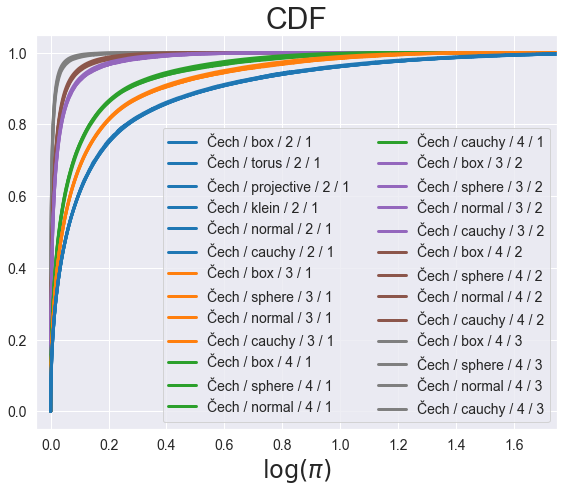

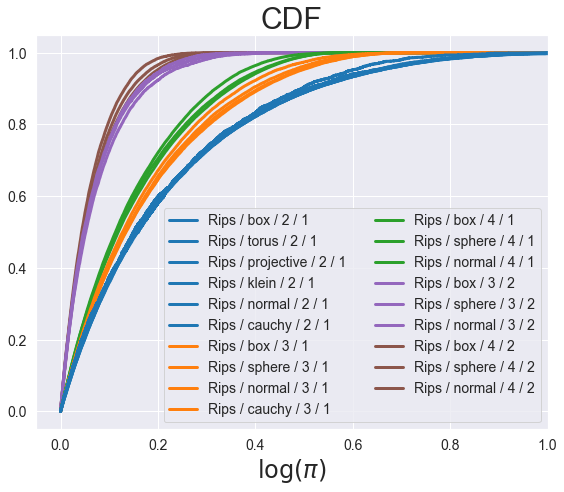

In [4]:
# Plot Cech/Alpha and RIPS CDFs 
# separately - all
# --------------------------
plt.figure(figsize=(8,7))
PDplot.plotCDFS_merge(ROOT, APLIST, xl=(-0.05,ALPHA_LIM_1), fnsize_title= FN_TITLE, fnsize_axes=FN_AXES,fnsize_tick = FN_TICK,fnsize_legend=FN_LEGEND, group_by_dim=True, group_labels = False)
plt.savefig('iid_body_cech', dpi=DPI)

plt.figure(figsize=(8,7))
PDplot.plotCDFS_merge(ROOT, RPLIST, xl=(-0.05,RIPS_LIM_1), fnsize_title= FN_TITLE, fnsize_axes=FN_AXES,fnsize_tick = FN_TICK,fnsize_legend=FN_LEGEND, group_by_dim=True, group_labels = False)
plt.savefig('iid_body_rips', dpi=DPI)

In [5]:
# Lists for non-iid
# -----------------------

# Lorenz system
LORENZ = ([
    [ALPHA, 'lorenz', 2, 1],
    [RIPS, 'lorenz', 2, 1],
])

# Brownian motion (sampled)
BM = ([
    [ALPHA, 'bm', 3, 1],
    [ALPHA, 'bm', 4, 1],
    [ALPHA, 'bm', 3, 2],
    [ALPHA, 'bm', 4, 2],

    [RIPS, 'bm', 3, 1],
    [RIPS, 'bm', 4, 1],
    [RIPS, 'bm', 3, 2],
    [RIPS, 'bm', 4, 2],
])

# Delay embedding of audio clip
# (Normalized)
VOICE = ([
    [RIPS, 'voice', 2, 1],
    [RIPS, 'voice', 3, 1],
    [RIPS, 'voice', 4, 1],
    [RIPS, 'voice', 5, 1],
])

# 3x3 image patches with filtering
PATCHES = ([
    [RIPS, 'patches', 3, 1],
    [RIPS, 'patches', 4, 1],
    [RIPS, 'patches', 5, 1],
    [RIPS, 'patches', 8, 1],
])

# All in 1 list, with desired
# order
ALLNOIID =  ([
    [ALPHA, 'lorenz', 2, 1],
    [ALPHA, 'bm', 4, 1],
    [ALPHA, 'bm', 4, 2],

    [RIPS, 'lorenz', 2, 1],
    [RIPS, 'bm', 4, 1],
    [RIPS, 'bm', 4, 2],
    [RIPS, 'voice', 4, 1],
    [RIPS, 'voice', 5, 1],
    [RIPS, 'patches', 5, 1],
    [RIPS, 'patches', 8, 1],
])

Čech / lorenz / 2 / 1 120406
2
Rips / lorenz / 2 / 1 16500
1.5


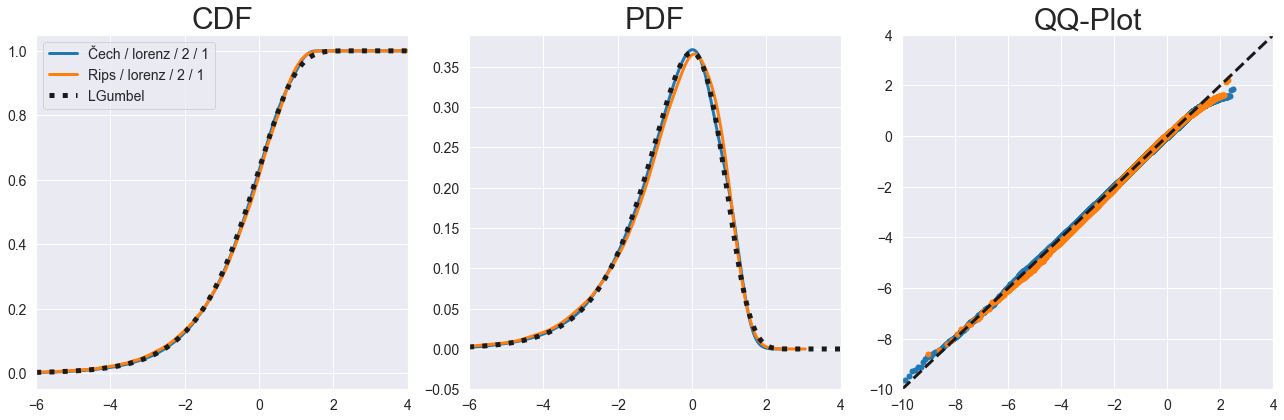

In [6]:
# Lorenz system plot
#----------------------
adj = [2,1.5]
plt.figure(figsize=(18,6))
PDplot.plotLogLogDist(ROOT,LORENZ,xl=(-6,4), xlqq=(-10,4), fnsize_title=FN_TITLE,  fnsize_legend=FN_LEGEND, fnsize_tick = FN_TICK, group_by_dim=False, adj_bw = adj, no_legend=False)
plt.savefig('bm_loglog', dpi=DPI)

Čech / bm / 3 / 1 87797
3
Čech / bm / 4 / 1 106931
3
Čech / bm / 3 / 2 32975
2
Čech / bm / 4 / 2 63082
2
Rips / bm / 3 / 1 14067
1
Rips / bm / 4 / 1 11515
1
Rips / bm / 3 / 2 1490
1
Rips / bm / 4 / 2 1101
1.5


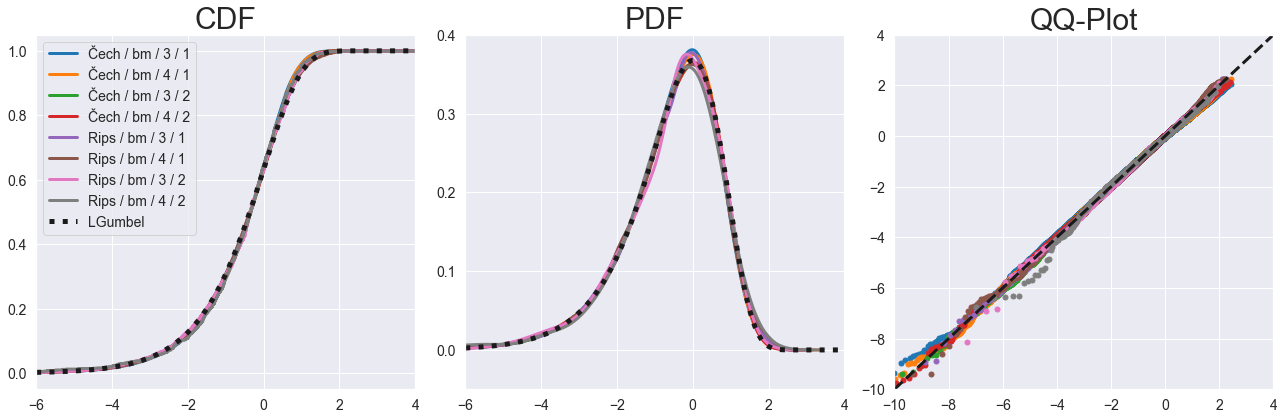

In [7]:
# Brownian motion plot
#----------------------
adj = [3,3,2,2,1,1,1,1.5]
plt.figure(figsize=(18,6))
PDplot.plotLogLogDist(ROOT,BM,xl=(-6,4), xlqq=(-10,4), fnsize_title=FN_TITLE,  fnsize_legend=FN_LEGEND, fnsize_tick = FN_TICK, group_by_dim=False, adj_bw = adj, no_legend=False)
plt.savefig('bm_loglog', dpi=DPI)

Rips / voice / 2 / 1 13145
1
Rips / voice / 3 / 1 27680
2
Rips / voice / 4 / 1 42843
3
Rips / voice / 5 / 1 55802
3


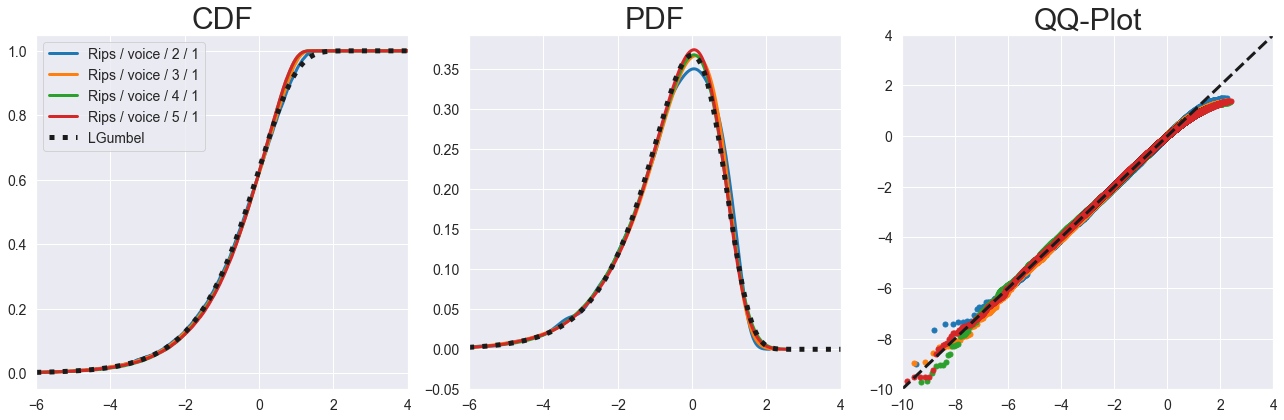

In [8]:
# audio clip plot
#----------------------
adj = [1,2,3,3]
plt.figure(figsize=(18,6))
PDplot.plotLogLogDist(ROOT,VOICE,chop=10,xl=(-6,4), xlqq=(-10,4), fnsize_title=FN_TITLE,  fnsize_legend=FN_LEGEND, fnsize_tick = FN_TICK, group_by_dim=False, adj_bw = adj, no_legend=False)
plt.savefig('voice_loglog', dpi=DPI)

Rips / patches / 3 / 1 14974
1.5
Rips / patches / 4 / 1 24831
2
Rips / patches / 5 / 1 31368
2.5
Rips / patches / 8 / 1 48538
3


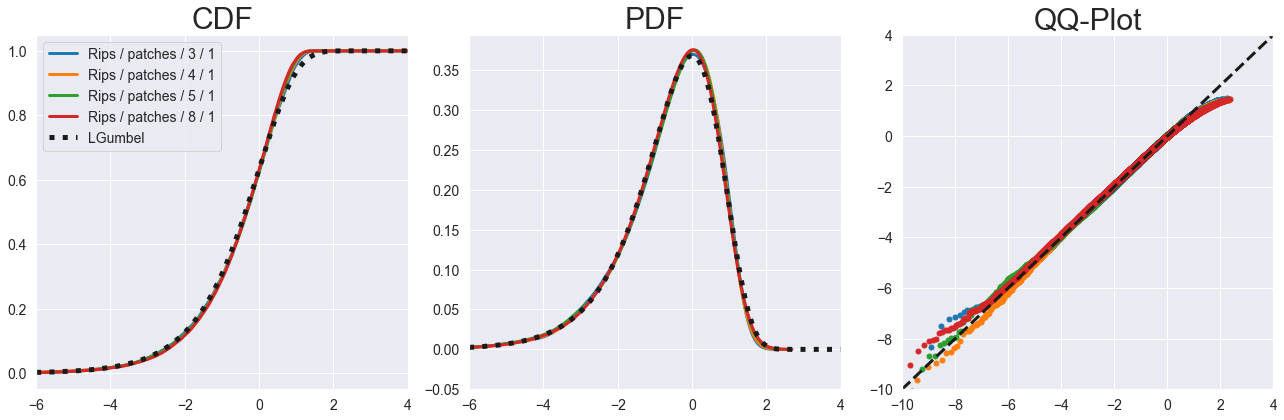

In [9]:
# Patches plot
#----------------------
adj = [1.5,2,2.5,3]
plt.figure(figsize=(18,6))
PDplot.plotLogLogDist(ROOT,PATCHES,chop=10,xl=(-6,4), xlqq=(-10,4), fnsize_title=FN_TITLE,  fnsize_legend=FN_LEGEND, fnsize_tick = FN_TICK, group_by_dim=False, adj_bw = adj, no_legend=False)
plt.savefig('patches_loglog', dpi=DPI)

Čech / lorenz / 2 / 1 120406
2
Čech / bm / 4 / 1 106931
3
Čech / bm / 4 / 2 63082
2
Rips / lorenz / 2 / 1 16500
1.5
Rips / bm / 4 / 1 11515
1
Rips / bm / 4 / 2 1101
1.5
Rips / voice / 4 / 1 42843
3
Rips / voice / 5 / 1 55802
3
Rips / patches / 5 / 1 31368
2.5
Rips / patches / 8 / 1 48538
3


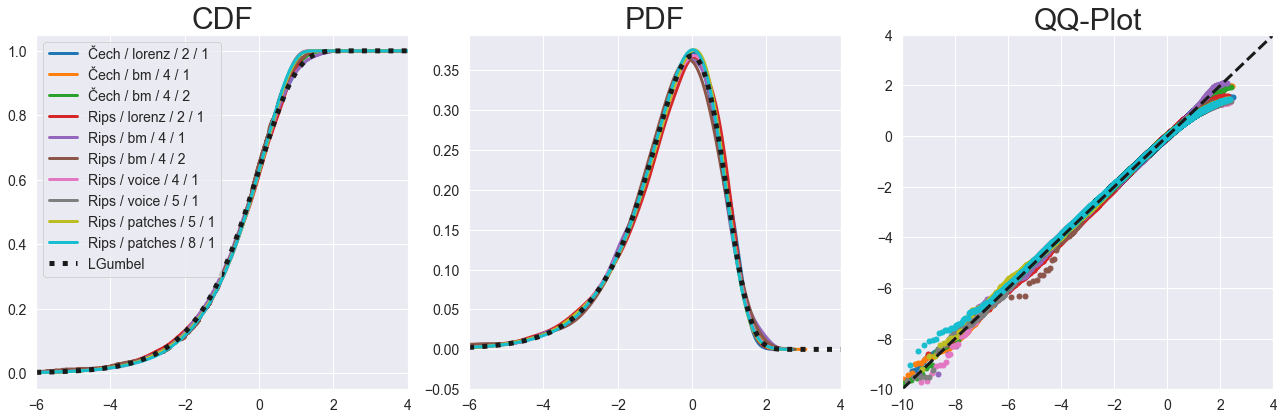

In [10]:
# All non-iid plot
# -----------------------
adj = [2, 3,2, 1.5,1,1.5,3,3,2.5,3]
plt.figure(figsize=(18,6))
PDplot.plotLogLogDist(ROOT,ALLNOIID,chop=10,xl=(-6,4), xlqq=(-10,4), fnsize_title=FN_TITLE,  fnsize_legend=FN_LEGEND, fnsize_tick = FN_TICK, group_by_dim=False, adj_bw = adj, no_legend=False)
plt.savefig('all_noiid_loglog', dpi=DPI)